link to kaggle:
https://www.kaggle.com/code/sainiamit/data-cleaning-enron-email-classification
EDA Goals:
1. get to know the dat
2. experiment with NLP techniques
3. understand how hard the k-anonimyty task is going to be:)


EDA questions:
1. how many different words in the dataset - LIOR
2. what are the most similar documents? - LIOR
3. seq2seq - HADAS?
4. sentiment analysis - LIOR
5. try to do BOW - HADAS
6. think what are the key-phrases
7. check if we have any k repetittions of key-phrases.
8. check if all documents are in English? - LIOR?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import email
import warnings 
warnings.filterwarnings('ignore')
import parser

In [2]:
# read the dataset
df= pd.read_csv("C:/Users/Lior/Desktop/ydata/Project (Intuit)/data/Enron/Emails/emails.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [4]:
df.describe()

,file,message
count,517401,517401
unique,517401,517401
top,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
freq,1,1


In [5]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [6]:
# get message value
print(df.loc[1]['file'])
print("\n")
print(df.loc[1]['message'])

allen-p/_sent_mail/10.


Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and wh

In [7]:
# transform the email into correct form
message = df.loc[1]['message']
emails = email.message_from_string(message)
emails.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [8]:
# get email body
emails.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [9]:
emails.get("Date")


'Fri, 4 May 2001 13:51:00 -0700 (PDT)'

In [10]:
# feature we are extract from the email 
# 1. date 2. X-From 3. X-To 4. Subject 5. X-Folder 
# extract feature from the email for all datasets
def extract_data(feature,df):
    column= []
    for row in df:
        e = email.message_from_string(row)
        column.append(e.get(feature))
    return column 

In [13]:
# df['Date'] = extract_data("Date",df['message'])
# df['Subject'] = extract_data("Subject",df['message'])
# we want the names in the df to see if we can annonymize them in the message itself
df['X-From'] = extract_data("X-From",df['message'])


KeyboardInterrupt: 

In [ ]:
df['X-To'] = extract_data("X-To",df['message'])


In [ ]:
df['X-Folder'] = extract_data("X-Folder",df['message'])

In [ ]:
# extract email body from email message
def get_email_body(data):
    column =[]
    for msg in data:
        e = email.message_from_string(msg)
        column.append(e.get_payload())
    return column
df['body'] = get_email_body(df['message'])

In [ ]:
# Employee names

def emp_name(data):
    column=[]
    for msg in data:
        column.append(msg.split("/")[0])
    return column

df['Employee'] = emp_name(df['file'])

In [ ]:
# some statistics
# top email sender employees
emp_data = pd.DataFrame(df['Employee'].value_counts())
emp_data.reset_index(inplace=True)

emp_data.columns =['Employee Name','Count']
emp_data.iloc[:20,:]

,Employee Name,Count
0,kaminski-v,28465
1,dasovich-j,28234
2,kean-s,25351
3,mann-k,23381
4,jones-t,19950
5,shackleton-s,18687
6,taylor-m,13875
7,farmer-d,13032
8,germany-c,12436
9,beck-s,11830


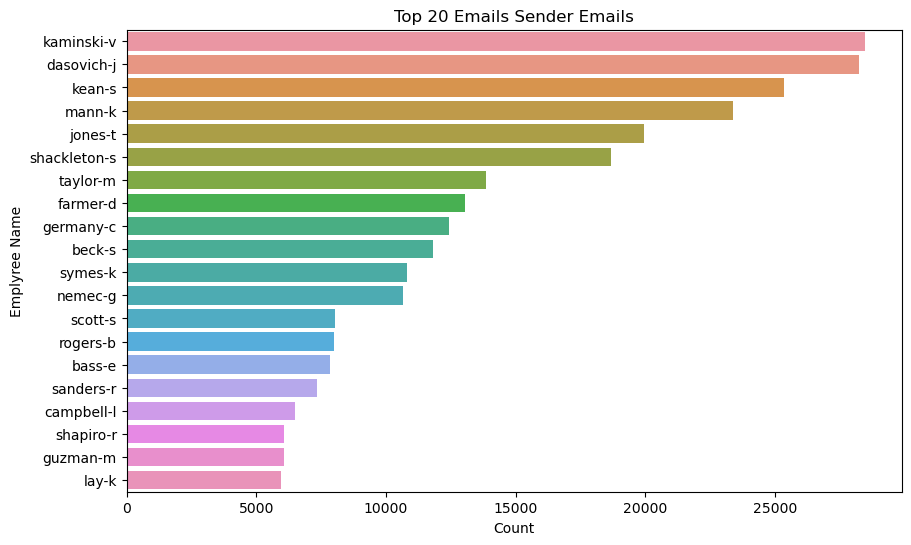

In [ ]:
# visualize top 20 emails sender employee
plt.figure(figsize=(10,6))
sns.barplot(x='Count',y='Employee Name',data=emp_data.iloc[:20,:])
plt.title("Top 20 Emails Sender Emails")
plt.xlabel("Count")

plt.ylabel("Emplyree Name")
plt.show()

In [ ]:
# calculate the missing value percentage
missing_value= df.isnull().sum()
miss =missing_value[missing_value>0]
miss_percen = miss/df.shape[0]

miss_percen

X-From      0.000056
X-To        0.000056
X-Folder    0.000056
dtype: float64

In [ ]:
# check if we have the coloums we want
df.columns
# and if there are columns we can drop

Index(['file', 'message', 'Date', 'Subject', 'X-From', 'X-To', 'X-Folder',
       'body', 'Employee'],
      dtype='object')

In [ ]:
df.head()


,file,message,Date,Subject,X-From,X-To,X-Folder,body,Employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,Phillip K Allen,Leah Van Arsdall,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,Phillip K Allen,Randall L Gay,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,Phillip K Allen,Greg Piper,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Let's shoot for Tuesday at 11:45.,allen-p


In [ ]:
# column  X-Folder
x_value =df.loc[1,"X-Folder"]
# extract last folder name
folder_name =x_value.split("\\")[-1]
folder_name

"'Sent Mail"

In [ ]:
def process_folder_name(folders):
    column=[]
    for folder in folders:
        if folder is None or folder=="":
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder']= process_folder_name(df['X-Folder']) 

In [ ]:
rows_count = len(df[df["X-Folder"] == "'sent mail"])


In [ ]:
# we will not work on the entire dataset, only on "sent mail" type of X-Folder:
# total of rows:
rows_count

30237

In [ ]:
filtered_df = df[df["X-Folder"] == "'sent mail"]

In [ ]:
filtered_df.head()

,file,message,Date,Subject,X-From,X-To,X-Folder,body,Employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,'sent mail,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,'sent mail,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,Phillip K Allen,Leah Van Arsdall,'sent mail,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,Phillip K Allen,Randall L Gay,'sent mail,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,Phillip K Allen,Greg Piper,'sent mail,Let's shoot for Tuesday at 11:45.,allen-p


In [12]:
# now need to drop some columns which is not necessary for the model 
drop_column_names= ['file','message','Date']
filtered_df.drop(columns=drop_column_names,axis=1,inplace=True)

NameError: name 'filtered_df' is not defined

In [ ]:
filtered_df.head()

,Subject,X-From,X-To,X-Folder,body,Employee
0,,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,'sent mail,Here is our forecast\n\n,allen-p
1,Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,'sent mail,Traveling to have a business meeting takes the...,allen-p
2,Re: test,Phillip K Allen,Leah Van Arsdall,'sent mail,test successful. way to go!!!,allen-p
3,,Phillip K Allen,Randall L Gay,'sent mail,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,Re: Hello,Phillip K Allen,Greg Piper,'sent mail,Let's shoot for Tuesday at 11:45.,allen-p


In [ ]:
df['num_of_words'] = df['txt'].apply(lambda x : len(x.split(' ')))


In [35]:
# save the clean CSV for later work with our model:
filtered_df.to_csv("cleaned_Endron_dataset.csv",index=False)


https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

# Getting to know the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [ ]:
# pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(-0.5, 399.5, 199.5, -0.5)

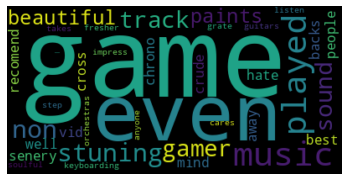

In [ ]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt


wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
df['num_of_words'] = df['txt'].apply(lambda x : len(x.split(' ')))
df.sample(5)


,txt,sentiment,num_of_words
2324823,not exactly: these are advertised as 10 teeth ...,0,122
3595937,"mother love, diana rigg and cast at their best...",1,76
236308,noise from the bowels of....: good lord this a...,0,42
2947225,presta screw bent: first time i used this the ...,0,38
2119999,good intro text: this was a helpful text for a...,1,51


Numbers of words in the documents

In [ ]:
import numpy as np

print(f'Minimum num of words per document {int(np.round(df["num_of_words"].min()))} words')
print(f'Minimum num of words per document {int(np.round(df["num_of_words"].max()))} words')
print(f'In average, each document contains {int(np.round(df["num_of_words"].mean()))} words')


4. What is the longest and the shortest entry?

In [ ]:

# assuming num of words
df.sort_values(by=['num_of_words']).head(1)

,txt,sentiment,num_of_words
1373977,booo: booooooooooooooooooooooooooooooooooooooo...,0,2


In [ ]:
df.sort_values(by=['num_of_words']).head(1).txt.tolist()

['booo: booooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo']

the shortest document contian one word which is a very long extension of "Booz" which has a very negative sentiment.

In [ ]:
len(str(df.sort_values(by=['num_of_words']).head(1).txt)) # 85 letters for "boo"

85

In [ ]:
df.sort_values(by=['num_of_words']).tail(1)

,txt,sentiment,num_of_words
3071621,ilok is rubbish!!: i have never been able to g...,0,257


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
df.sentiment.value_counts()

1    1800000
0    1800000
Name: sentiment, dtype: int64

Each sentiment includes exactly 1.800,000 documents.

1.   List item
2.   List item



Document size distribution

Text(0, 0.5, 'Documents')

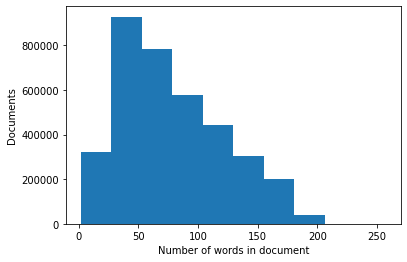

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['num_of_words'])
plt.xlabel('Number of words in document')
plt.ylabel('Documents')


# Working with GloVe

In [ ]:
import gensim.downloader as api
glove_model = api.load('glove-twitter-25')


[==================================================] 100.0% 104.8/104.8MB downloaded


Counting the words that are known to GloVe

In [ ]:
df['known_to_glove'] = df['txt'].apply(lambda x : sum([1 for item in x.split(' ') if glove_model.__contains__(item)]))

In [ ]:
df

,txt,sentiment,num_of_words,known_to_glove
0,stuning even for the non-gamer: this sound tra...,1,80,72
1,the best soundtrack ever to anything.: i'm rea...,1,97,82
2,amazing!: this soundtrack is my favorite music...,1,129,96
3,excellent soundtrack: i truly like this soundt...,1,118,86
4,"remember, pull your jaw off the floor after he...",1,87,62
...,...,...,...,...
3599995,don't do it!!: the high chair looks great when...,0,86,77
3599996,"looks nice, low functionality: i have used thi...",0,186,162
3599997,"compact, but hard to clean: we have a small ho...",0,178,155
3599998,what is it saying?: not sure what this book is...,0,86,73


Most words in our dataset are known to GloVe  (this is before pre-processing)


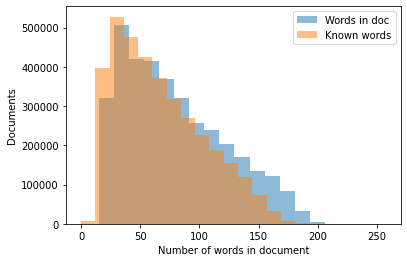

In [ ]:
plt.hist(df['num_of_words'], alpha=0.5, label='Words in doc', bins=20)
plt.hist(df['known_to_glove'], alpha=0.5, label='Known words', bins=20)

plt.xlabel('Number of words in document')
plt.ylabel('Documents')
plt.legend();